In [9]:
from os.path import join as pjoin
import pandas as pd
import numpy as np
import osgeo
import xarray as xr
import xrspatial as xrs
import rioxarray
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
no_data_value = 3000
dsm = rioxarray.open_rasterio("R_31HZ1.TIF")
dsm = dsm.where(dsm < no_data_value, np.nan)
background = rioxarray.open_rasterio("../nl_8cm/2022_133000_456000_RGB_hrl.tif")
mask = gpd.read_file("../masks/2022_133000_456000_RGB_hrl.gpkg")

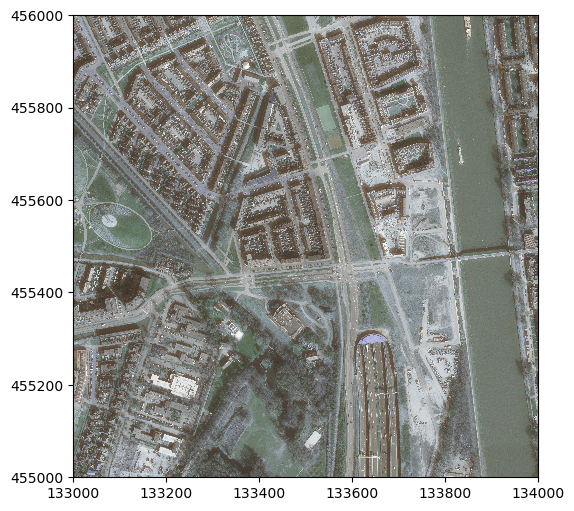

In [11]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
background[0:3,:,:][::-1].plot.imshow(ax=ax, rgb='band', add_labels=False)
plt.show()

In [12]:
bounds = background.rio.bounds()

In [13]:
clipped_dsm = dsm.rio.clip_box(minx=bounds[0], miny=bounds[1], maxx=bounds[2], maxy=bounds[3])

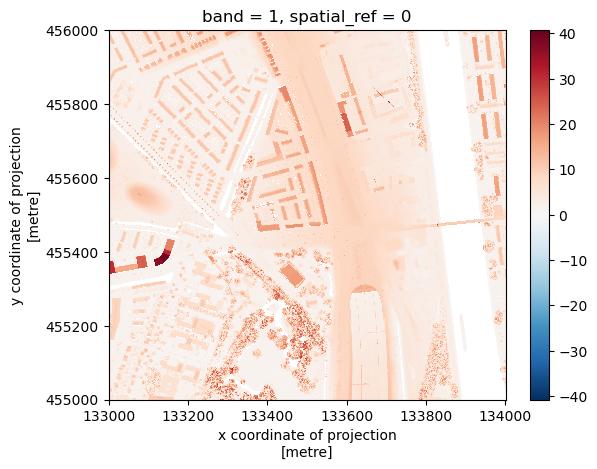

In [14]:
clipped_dsm.plot()

<Axes: >

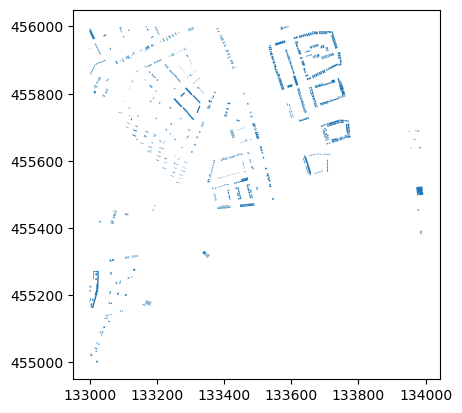

In [15]:
mask.plot()

In [16]:
mask

,solarpanel,geometry
0,1,"MULTIPOLYGON (((133000.042 455996.655, 133001...."
1,1,"MULTIPOLYGON (((133048.164 455976.716, 133049...."
2,1,"MULTIPOLYGON (((133088.376 455995.471, 133094...."
3,1,"MULTIPOLYGON (((133091.283 455991.303, 133092...."
4,1,"MULTIPOLYGON (((133114.630 455989.451, 133118...."
...,...,...
1138,1,"MULTIPOLYGON (((133410.375 455513.177, 133411...."
1139,1,"MULTIPOLYGON (((133410.630 455513.235, 133411...."
1140,1,"MULTIPOLYGON (((133412.209 455513.652, 133413...."
1141,1,"MULTIPOLYGON (((133413.706 455513.989, 133414...."
